In [1]:
pip install torch torchvision matplotlib seaborn scikit-learn


  Using cached torch-2.7.1-cp313-none-macosx_11_0_arm64.whl.metadata (29 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.7.0-py3-none-any.whl.metadata (12 kB)
Using cached torch-2.7.1-cp313-none-macosx_11_0_arm64.whl (68.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 70.8 kB/s eta 0:00:00a 0:00:02m
Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
Using cached fsspec-2025.7.0-py3-none-any.whl (199 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.5/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
iris = load_iris()
x, y = iris.data, iris.target
scaler = StandardScaler()
x = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [6]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(4, 16)     
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(16, 8)     
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(8, 3)      
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x  

In [7]:
model = SimpleMLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_train).float().mean()
    train_accuracies.append(accuracy.item())

    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch+1}/{epochs} | Loss: {loss.item():.4f} | Accuracy: {accuracy.item()*100:.2f}%")


Epoch 1/100 | Loss: 1.1412 | Accuracy: 31.67%
Epoch 11/100 | Loss: 0.9355 | Accuracy: 80.00%
Epoch 21/100 | Loss: 0.6182 | Accuracy: 78.33%
Epoch 31/100 | Loss: 0.4336 | Accuracy: 82.50%
Epoch 41/100 | Loss: 0.3377 | Accuracy: 90.00%
Epoch 51/100 | Loss: 0.2655 | Accuracy: 95.00%
Epoch 61/100 | Loss: 0.2142 | Accuracy: 96.67%
Epoch 71/100 | Loss: 0.1824 | Accuracy: 96.67%
Epoch 81/100 | Loss: 0.1595 | Accuracy: 96.67%
Epoch 91/100 | Loss: 0.1420 | Accuracy: 97.50%
Epoch 100/100 | Loss: 0.1295 | Accuracy: 97.50%



Test Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



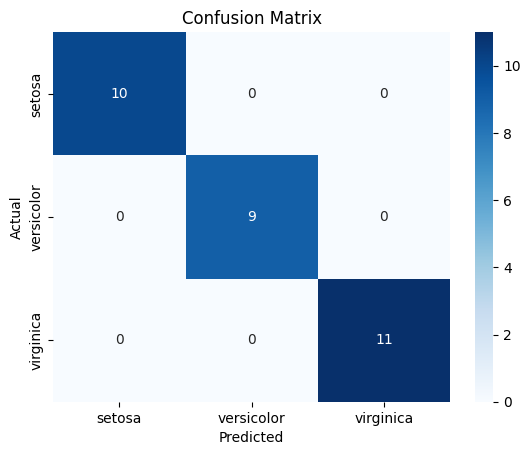

In [8]:
model.eval()
with torch.no_grad():
    outputs_test = model(X_test)
    _, predicted_test = torch.max(outputs_test, 1)

    test_accuracy = (predicted_test == y_test).float().mean()
    print(f"\nTest Accuracy: {test_accuracy.item() * 100:.2f}%\n")

    print("Classification Report:")
    print(classification_report(y_test, predicted_test, target_names=iris.target_names))

    cm = confusion_matrix(y_test, predicted_test)
    sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


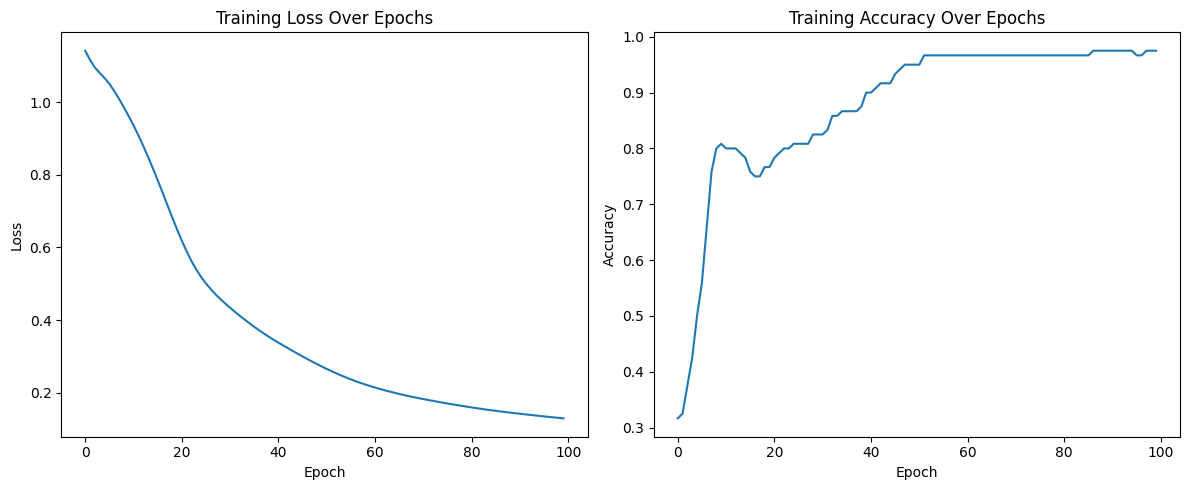

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.title("Training Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()


NameError: name 'item' is not defined